<h1>Setup</h1>

In [7]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#!pip install pandas-profiling[notebook]
#from pandas_profiling import ProfileReport

In [8]:
data = pd.read_csv("K2_MEN_DATASET.csv").set_index("Date")
print(data.columns)
print(data.describe())
print(data.head(5))

Index(['Unnamed: 0', 'Place', 'Time', 'Category', 'Sex', 'Country', 'Lane',
       'Person 1', 'Person 2', 'split time 1', 'split time 2', 'split time 3',
       'Total Time_x', 'Final Rank_x', 'Air Temp', 'Wind Speed',
       'Wind Direction', 'Day', 'Month', 'Year', 'Team', 'Competition_ID',
       'Race_ID', 'Team_ID', 'Competiton Type_WORLDCHAMPIONSHIPS',
       'Competiton Type_WORLDCUP', 'Competition Round_FINAL A',
       'Competition Round_FINAL B', 'Competition Round_FINAL C',
       'Competition Round_HEAT', 'Competition Round_SEMIFINAL',
       'Reached_FINAL_A', 'Reached_SEMI', 'D0_250', 'D250_500', 'D500_750',
       'D750_1000', 'FinalA_count_Season', 'BestSeasonTime', 'Top3Avg',
       'TotalRacesTogether', 'TotalAFinalsTogether', 'TotalSemiFinalsTogether',
       'N1THeatCompetition', 'N1TSemiCompetition', 'z ', 'N1TCompetition',
       'HeatTop3Avg', 'SemiTop3Avg', 'HeatTop9Avg', 'SemiTop9Avg', 'TT1',
       'TT2', 'TT3', 'TT4', 'TT5', 'TT6', 'TT7', 'TT8', 'TT9', 'T1_2

In [8]:
N1TFinalACompetition = data[["Competition_ID","N1TFinalACompetition"]].copy().drop_duplicates().set_index('Competition_ID')
print(N1TFinalACompetition)
fig,ax = plt.subplots()
ax.plot(N1TFinalACompetition["N1TFinalACompetition"].to_numpy())

KeyError: "['N1TFinalACompetition'] not in index"

HeatTop3Avg  SemiTop3Avg  HeatTop9Avg  SemiTop9Avg
Date                                                                   
2013-05-17 10:58:00   204.000000   206.000000   205.333333   219.777778
2013-10-05 10:48:00   210.333333   215.666667   215.444444   216.888889
2013-08-29 10:29:00   191.666667   194.333333   192.444444   196.111111
2014-05-16 11:05:00   201.666667   205.666667   204.222222   207.555556
2014-05-23 10:46:00   207.666667   202.000000   209.222222   203.000000
2014-03-05 09:40:00   204.666667   217.000000   212.166667   222.400000


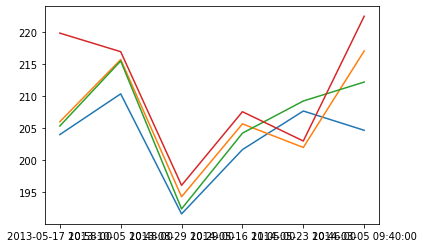

In [9]:
Top3Averages = data[['HeatTop3Avg', 'SemiTop3Avg', 'HeatTop9Avg',
       'SemiTop9Avg']].copy().drop_duplicates()
print(Top3Averages)
fig,ax = plt.subplots()
ax.plot(Top3Averages)

shape: (1395, 6)
after removel of Nan: (224, 6)


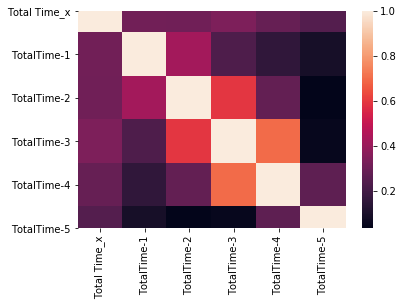

In [10]:
PastResultTimes = data[['Total Time_x','TotalTime-1','TotalTime-2','TotalTime-3','TotalTime-4','TotalTime-5']].copy()
print("shape:",PastResultTimes.shape)
PastResultTimes = PastResultTimes.dropna()
print("after removel of Nan:",PastResultTimes.shape)
PastResultsCorrelation = PastResultTimes.corr()
sns.heatmap(PastResultsCorrelation)

shape: (1395, 6)
after removel of Nan: (224, 6)
                     Final Rank_x  Rank-1  Rank-2  Rank-3  Rank-4  Rank-5
Date                                                                     
2013-05-17 10:58:00           2.0     3.0     4.0     4.0     2.0     2.0
2013-05-17 10:58:00           2.0     3.0     3.0     4.0     4.0     2.0
2013-05-17 10:58:00           2.0     2.0     3.0     3.0     4.0     4.0
2013-05-18 11:09:00           2.0     3.0     4.0     4.0     2.0     2.0
2013-05-18 11:09:00           2.0     3.0     3.0     4.0     4.0     2.0


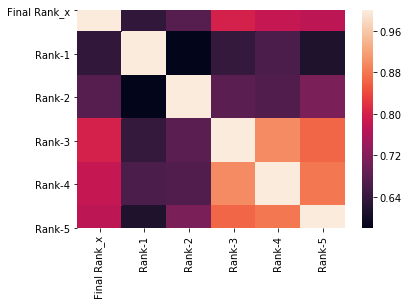

In [11]:
PastResultRanks = data[['Final Rank_x','Rank-1','Rank-2','Rank-3','Rank-4','Rank-5']].copy()
print("shape:",PastResultRanks.shape)
PastResultRanks = PastResultRanks.dropna()
print("after removel of Nan:",PastResultRanks.shape)
print(PastResultRanks.head(5))
PastResultRanksCorrelation = PastResultRanks.corr()
sns.heatmap(PastResultRanksCorrelation)

shape: (1395, 4)
after removel of Nan: (480, 4)
                     Final Rank_x  Rank-1  Rank-2  Rank-3
Date                                                     
2013-05-17 10:58:00           2.0     4.0     2.0     2.0
2013-05-17 10:58:00           2.0     4.0     4.0     2.0
2013-05-17 10:58:00           2.0     3.0     4.0     4.0
2013-05-17 10:58:00           2.0     3.0     3.0     4.0
2013-05-17 10:58:00           2.0     2.0     3.0     3.0


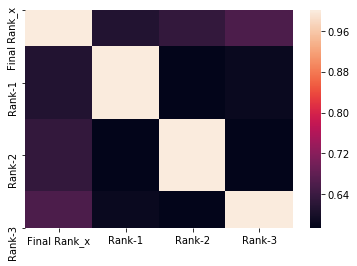

In [12]:
PastResultRanksLast3 = data[['Final Rank_x','Rank-1','Rank-2','Rank-3']].copy()
print("shape:",PastResultRanksLast3.shape)
PastResultRanksLast3 = PastResultRanksLast3.dropna()
print("after removel of Nan:",PastResultRanksLast3.shape)
print(PastResultRanksLast3.head(5))
PastResultRanksCorrelation = PastResultRanksLast3.corr()
sns.heatmap(PastResultRanksCorrelation)

(1376, 4)
                     Total Time_x  split time 1  split time 2  split time 3
Date                                                                       
2013-05-17 10:58:00           205          51.0          89.0         151.0
2013-05-17 10:58:00           205          51.0          89.0         151.0
2013-05-17 15:34:00           206          52.0         102.0         153.0
2013-05-17 15:34:00           206          52.0         102.0         153.0
2013-05-17 10:58:00           207          49.0          98.0         154.0


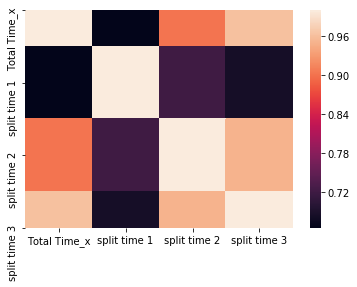

In [13]:
splitTimes = data[['Total Time_x','split time 1', 'split time 2', 'split time 3']].copy().dropna()
print(splitTimes.shape)
print(splitTimes.head())
splitTimesCorrelation = splitTimes.corr()
sns.heatmap(splitTimesCorrelation)

(1376, 5)
                     Total Time_x  D0_250  D250_500  D500_750  D750_1000
Date                                                                    
2013-05-17 10:58:00           205    51.0      38.0      62.0       54.0
2013-05-17 10:58:00           205    51.0      38.0      62.0       54.0
2013-05-17 15:34:00           206    52.0      50.0      51.0       53.0
2013-05-17 15:34:00           206    52.0      50.0      51.0       53.0
2013-05-17 10:58:00           207    49.0      49.0      56.0       53.0


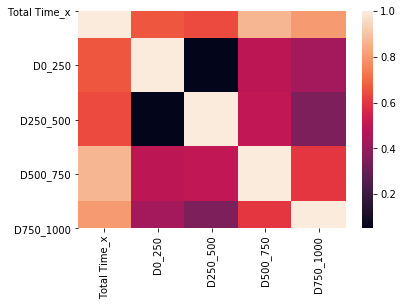

In [14]:
splitTimeDifferences = data[['Total Time_x','D0_250', 'D250_500', 'D500_750',
       'D750_1000']].copy().dropna()
print(splitTimeDifferences.shape)
print(splitTimeDifferences.head(5))
splitTimeDifferencesCorrelation = splitTimeDifferences.corr()
sns.heatmap(splitTimeDifferencesCorrelation)

<h1>Predicting</h1>

<h2>Predicting Total Time from past results</h2>

In [33]:
from sklearn import linear_model
from sklearn import tree

regressionModel = linear_model.LinearRegression()
ridgeRegressionModel = linear_model.Ridge()
lasso = linear_model.Lasso(alpha=0.1)
decissionTree = tree.DecisionTreeRegressor()

In [34]:

df = data[['Total Time_y','TotalTime-1','TotalTime-2','TotalTime-3','TotalTime-4','TotalTime-5']].copy().dropna()
Labels =['Total Time_y']
Features = ['TotalTime-1','TotalTime-2','TotalTime-3','TotalTime-4','TotalTime-5']

X = df[Features].to_numpy()
Y = df[Labels].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [44]:

df = data[['Total Time_y','TotalTime-3']].copy().dropna()
Labels =['Total Time_y']
Features = ['TotalTime-3']

X = df[Features].to_numpy()
Y = df[Labels].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [45]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


regressionModel.fit(X_train,y_train)
ridgeRegressionModel.fit(X_train,y_train)
lasso.fit(X_train,y_train)

testPredictions = regressionModel.predict(X_test)
print("Linear R2:",r2_score(y_test,testPredictions))
print("Linear MSE:",mean_squared_error(y_test,testPredictions))
print("Linear MAE:",mean_absolute_error(y_test,testPredictions))

testPredictions = ridgeRegressionModel.predict(X_test)
print("Ridge R2:",r2_score(y_test,testPredictions))
print("Ridge MSE:",mean_squared_error(y_test,testPredictions))
print("Ridge MAE:",mean_absolute_error(y_test,testPredictions))

testPredictions = lasso.predict(X_test)
print("Lasso R2:",r2_score(y_test,testPredictions))
print("Lasso MSE:",mean_squared_error(y_test,testPredictions))
print("Lasso MAE:",mean_absolute_error(y_test,testPredictions))

Linear R2: 0.01678285770213417
Linear MSE: 49.67711012613237
Linear MAE: 5.742960982013927
Ridge R2: 0.01678222559024445
Ridge MSE: 49.677142063626754
Ridge MAE: 5.742971569620459
Lasso R2: 0.016522481018903634
Lasso MSE: 49.690265675004206
Lasso MAE: 5.747253414568149


<h2>Predicting Rank From past Results </h2>

In [35]:
df = data[['Final Rank_x','Rank-1','Rank-2','Rank-3','Rank-4','Rank-5']].copy().dropna()
Labels =['Final Rank_x']
Features = ['Rank-1','Rank-2','Rank-3','Rank-4','Rank-5']

X = df[Features].to_numpy()
Y = df[Labels].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [46]:
df = data[['Final Rank_x','Rank-3']].copy().dropna()
Labels =['Final Rank_x']
Features = ['Rank-3']

X = df[Features].to_numpy()
Y = df[Labels].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [47]:
regressionModel.fit(X_train,y_train)
ridgeRegressionModel.fit(X_train,y_train)
lasso.fit(X_train,y_train)

testPredictions = regressionModel.predict(X_test)
print("Linear R2:",r2_score(y_test,testPredictions))
print("Linear MSE:",mean_squared_error(y_test,testPredictions))
print("Linear MAE:",mean_absolute_error(y_test,testPredictions))

testPredictions = ridgeRegressionModel.predict(X_test)
print("Ridge R2:",r2_score(y_test,testPredictions))
print("Ridge MSE:",mean_squared_error(y_test,testPredictions))
print("Ridge MAE:",mean_absolute_error(y_test,testPredictions))

testPredictions = lasso.predict(X_test)
print("Lasso R2:",r2_score(y_test,testPredictions))
print("Lasso MSE:",mean_squared_error(y_test,testPredictions))
print("Lasso MAE:",mean_absolute_error(y_test,testPredictions))

Linear R2: 0.4947861571733364
Linear MSE: 2.52733005597197
Linear MAE: 1.1799769301246983
Ridge R2: 0.4947731814020152
Ridge MSE: 2.5273949672116856
Ridge MAE: 1.180090551728261
Lasso R2: 0.493612419061513
Lasso MSE: 2.533201675782017
Lasso MAE: 1.1865506142295013


<h2>Predicting Total Time from SplitTimes</h2>

In [38]:
df = data[['Total Time_y','split time 1', 'split time 2', 'split time 3']].copy().dropna()
Labels =['Total Time_y']
Features = ['split time 1', 'split time 2', 'split time 3']

X = df[Features].to_numpy()
Y = df[Labels].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [55]:
df = data[['Total Time_y', 'split time 3']].copy().dropna()
Labels =['Total Time_y']
Features = [ 'split time 3']

X = df[Features].to_numpy()
Y = df[Labels].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [56]:
regressionModel.fit(X_train,y_train)
ridgeRegressionModel.fit(X_train,y_train)
lasso.fit(X_train,y_train)

testPredictions = regressionModel.predict(X_test)
print("Linear R2:",r2_score(y_test,testPredictions))
print("Linear MSE:",mean_squared_error(y_test,testPredictions))
print("Linear MAE:",mean_absolute_error(y_test,testPredictions))

testPredictions = ridgeRegressionModel.predict(X_test)
print("Ridge R2:",r2_score(y_test,testPredictions))
print("Ridge MSE:",mean_squared_error(y_test,testPredictions))
print("Ridge MAE:",mean_absolute_error(y_test,testPredictions))

testPredictions = lasso.predict(X_test)
print("Lasso R2:",r2_score(y_test,testPredictions))
print("Lasso MSE:",mean_squared_error(y_test,testPredictions))
print("Lasso MAE:",mean_absolute_error(y_test,testPredictions))

Linear R2: 0.3678993162369185
Linear MSE: 56.910216963039744
Linear MAE: 5.58878456288908
Ridge R2: 0.36789922013554455
Ridge MSE: 56.91022561537977
Ridge MAE: 5.588789902468122
Lasso R2: 0.36788490799227813
Lasso MSE: 56.91151418727886
Lasso MAE: 5.5895381881145605


In [9]:
from sklearn.linear_model import LogisticRegression

df = data[['Total Time_x','Reached_SEMI','Competition Round_HEAT']].copy().dropna()
df = df[(df['Competition Round_HEAT']== True)]
print(df.head(5))
print(df.shape)

X = df[['Total Time_x']].to_numpy()
Y = df[['Reached_SEMI']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

LogisticRegression = LogisticRegression().fit(X_train,y_train)
print("Logistic Regression Score:",LogisticRegression.score(X_test,y_test))

print(LogisticRegression.classes_)
print(LogisticRegression.predict_proba([[185]]))

Total Time_x  Reached_SEMI  Competition Round_HEAT
Date                                                                   
2013-05-17 10:58:00           205          True                    True
2013-05-17 10:58:00           205          True                    True
2013-05-17 10:58:00           207         False                    True
2013-05-17 10:58:00           207         False                    True
2013-05-17 10:58:00           207         False                    True
(543, 3)
Logistic Regression Score: 0.7339449541284404
[False  True]
[[0.1530103 0.8469897]]


In [53]:

from sklearn.linear_model import LogisticRegression
df = data[['Total Time_x','Reached_SEMI','Competition Round_HEAT','TotalTime-1','TotalTime-2','TotalTime-3','TotalTime-4','TotalTime-5']].copy().dropna()
df = df[(df['Competition Round_HEAT']== True)]
print(df.head(5))
print(df.shape)

X = df[['Total Time_x','TotalTime-1','TotalTime-2','TotalTime-3','TotalTime-4','TotalTime-5']].to_numpy()
Y = df[['Reached_SEMI']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

LogisticRegression = LogisticRegression().fit(X_train,y_train)
print("Logistic Regression Score:",LogisticRegression.score(X_test,y_test))
TestPredictions = LogisticRegression.predict(X_test)
print(confusion_matrix(y_test,TestPredictions).ravel())

Total Time_x  Reached_SEMI  Competition Round_HEAT  \
Date                                                                      
2013-05-17 10:58:00           207         False                    True   
2013-05-17 10:58:00           207         False                    True   
2013-05-17 10:58:00           207         False                    True   
2013-10-05 10:48:00           220          True                    True   
2013-10-05 10:48:00           220          True                    True   

                     TotalTime-1  TotalTime-2  TotalTime-3  TotalTime-4  \
Date                                                                      
2013-05-17 10:58:00        199.0        199.0        195.0        191.0   
2013-05-17 10:58:00        220.0        199.0        199.0        195.0   
2013-05-17 10:58:00        216.0        220.0        199.0        199.0   
2013-10-05 10:48:00        199.0        199.0        195.0        191.0   
2013-10-05 10:48:00        220.0        199.0

DT Score: 0.9444444444444444
[ 5  1  0 12]


[Text(66.96000000000001, 209.07692307692307, 'X[0] <= 201.5\ngini = 0.423\nsamples = 69\nvalue = [21, 48]'),
 Text(33.480000000000004, 192.35076923076923, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(100.44000000000001, 192.35076923076923, 'X[0] <= 215.5\ngini = 0.482\nsamples = 52\nvalue = [21, 31]'),
 Text(66.96000000000001, 175.62461538461537, 'X[0] <= 203.5\ngini = 0.5\nsamples = 42\nvalue = [21, 21]'),
 Text(33.480000000000004, 158.89846153846153, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(100.44000000000001, 158.89846153846153, 'X[0] <= 206.0\ngini = 0.494\nsamples = 38\nvalue = [17, 21]'),
 Text(66.96000000000001, 142.1723076923077, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(133.92000000000002, 142.1723076923077, 'X[4] <= 195.5\ngini = 0.495\nsamples = 31\nvalue = [17, 14]'),
 Text(66.96000000000001, 125.44615384615385, 'X[5] <= 190.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(33.480000000000004, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 

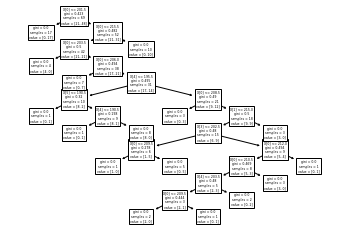

In [54]:
from sklearn import tree
decissionTree = tree.DecisionTreeClassifier().fit(X_train,y_train)
print("DT Score:",decissionTree.score(X_test,y_test))
TestPredictions = decissionTree.predict(X_test)
print(confusion_matrix(y_test,TestPredictions).ravel())
tree.plot_tree(decissionTree)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


df = data[['Total Time_x','Reached_FINAL_A','Competition Round_SEMIFINAL']].copy().dropna()
df = df[(df['Competition Round_SEMIFINAL']== True)]
print(df.head(5))
print(df.shape)

X = df[['Total Time_x']].to_numpy()
Y = df[['Reached_FINAL_A']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)



LogisticRegression = LogisticRegression().fit(X_train,y_train)
print("Logistic Regression Score:",LogisticRegression.score(X_test,y_test))
TestPredictions = LogisticRegression.predict(X_test)
print(confusion_matrix(y_test,TestPredictions).ravel())

Total Time_x  Reached_FINAL_A  \
Date                                                 
2013-05-17 15:34:00           206            False   
2013-05-17 15:34:00           206            False   
2013-10-05 15:24:00           216             True   
2013-10-05 15:24:00           216             True   
2013-10-05 15:24:00           216             True   

                     Competition Round_SEMIFINAL  
Date                                              
2013-05-17 15:34:00                         True  
2013-05-17 15:34:00                         True  
2013-10-05 15:24:00                         True  
2013-10-05 15:24:00                         True  
2013-10-05 15:24:00                         True  
(404, 3)
Logistic Regression Score: 0.6172839506172839
[29 17 14 21]


DT Score: 0.8148148148148148
[39  7  8 27]


[Text(169.074, 201.90857142857143, 'X[0] <= 205.5\ngini = 0.487\nsamples = 323\nvalue = [188, 135]'),
 Text(53.568000000000005, 170.84571428571428, 'X[0] <= 197.5\ngini = 0.428\nsamples = 129\nvalue = [40, 89]'),
 Text(40.176, 139.78285714285715, 'gini = 0.0\nsamples = 33\nvalue = [0, 33]'),
 Text(66.96000000000001, 139.78285714285715, 'X[0] <= 201.5\ngini = 0.486\nsamples = 96\nvalue = [40, 56]'),
 Text(40.176, 108.72, 'X[0] <= 199.5\ngini = 0.375\nsamples = 36\nvalue = [27, 9]'),
 Text(26.784000000000002, 77.65714285714284, 'X[0] <= 198.5\ngini = 0.436\nsamples = 28\nvalue = [19, 9]'),
 Text(13.392000000000001, 46.59428571428572, 'gini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(40.176, 46.59428571428572, 'gini = 0.457\nsamples = 17\nvalue = [11, 6]'),
 Text(53.568000000000005, 77.65714285714284, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(93.74400000000001, 108.72, 'X[0] <= 202.5\ngini = 0.339\nsamples = 60\nvalue = [13, 47]'),
 Text(80.352, 77.65714285714284, 'gini = 0.375

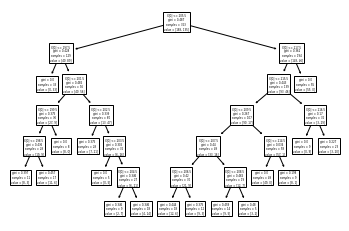

In [52]:
from sklearn import tree
decissionTree = tree.DecisionTreeClassifier().fit(X_train,y_train)
print("DT Score:",decissionTree.score(X_test,y_test))
TestPredictions = decissionTree.predict(X_test)
print(confusion_matrix(y_test,TestPredictions).ravel())
tree.plot_tree(decissionTree)